<ipython-input-6-342a2e684bf0>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N["Diff"]= Diff


Epoch 1/50
96/96 [==============================] - 2s 6ms/step - loss: 0.0796 - val_loss: 0.0716
Epoch 2/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0601 - val_loss: 0.0645
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0557 - val_loss: 0.0620
Epoch 4/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0533 - val_loss: 0.0600
Epoch 5/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0530 - val_loss: 0.0592
Epoch 6/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0508 - val_loss: 0.0586
Epoch 7/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0508 - val_loss: 0.0573
Epoch 8/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0499 - val_loss: 0.0572
Epoch 9/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0483 - val_loss: 0.0572
Epoch 10/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0480 - val_loss: 0.0567
Epoch 11/50
96/96 [

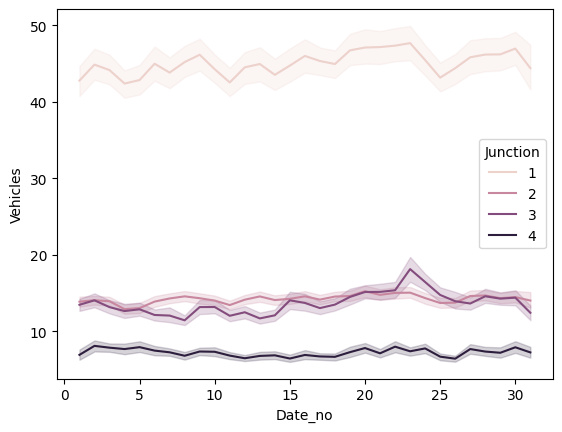

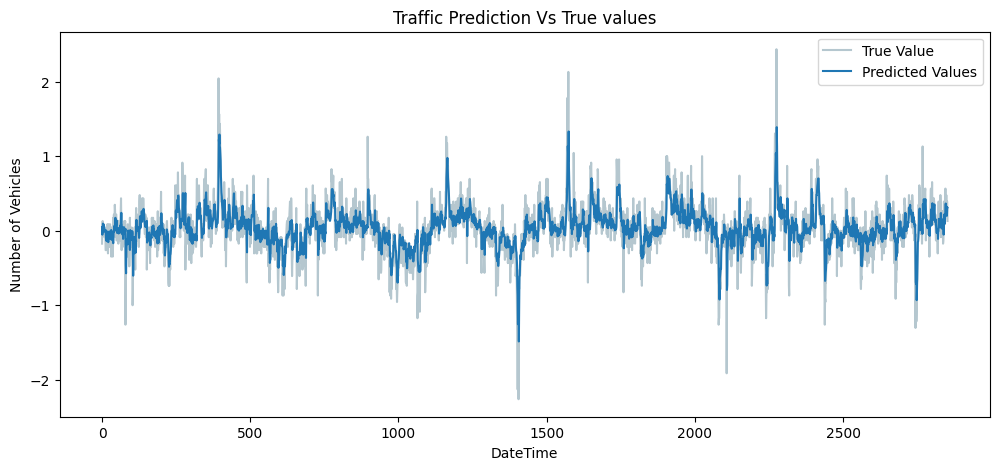

Epoch 1/50
96/96 [==============================] - 16s 117ms/step - loss: 0.0538 - val_loss: 0.0625
Epoch 2/50
96/96 [==============================] - 9s 98ms/step - loss: 0.0480 - val_loss: 0.0596
Epoch 3/50
96/96 [==============================] - 10s 104ms/step - loss: 0.0466 - val_loss: 0.0584
Epoch 4/50
96/96 [==============================] - 12s 124ms/step - loss: 0.0459 - val_loss: 0.0579
Epoch 5/50
96/96 [==============================] - 11s 115ms/step - loss: 0.0458 - val_loss: 0.0572
Epoch 6/50
96/96 [==============================] - 10s 109ms/step - loss: 0.0455 - val_loss: 0.0577
Epoch 7/50
96/96 [==============================] - 10s 102ms/step - loss: 0.0453 - val_loss: 0.0568
Epoch 8/50
96/96 [==============================] - 10s 100ms/step - loss: 0.0451 - val_loss: 0.0574
Epoch 9/50
96/96 [==============================] - 11s 115ms/step - loss: 0.0453 - val_loss: 0.0573
Epoch 10/50
96/96 [==============================] - 11s 115ms/step - loss: 0.0443 - val_loss

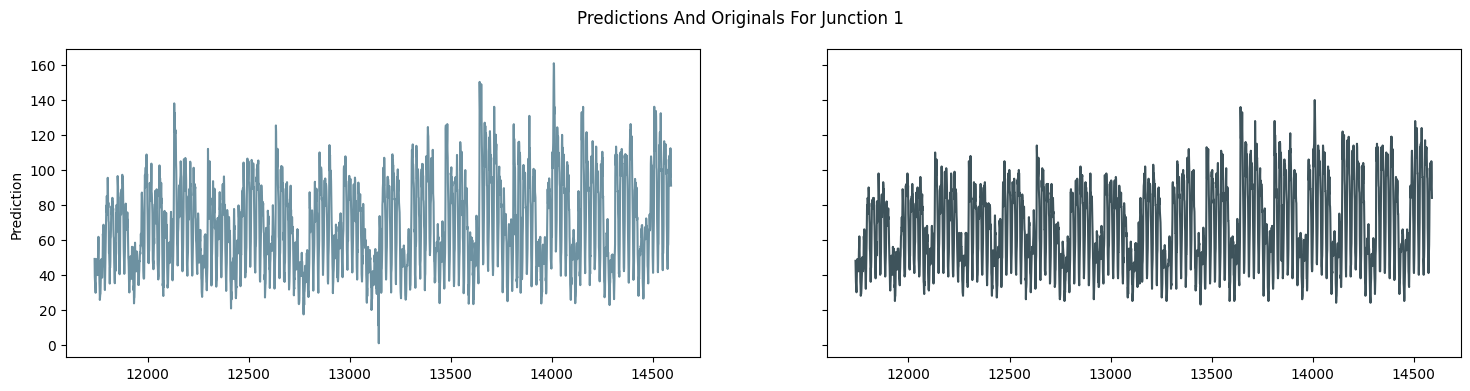

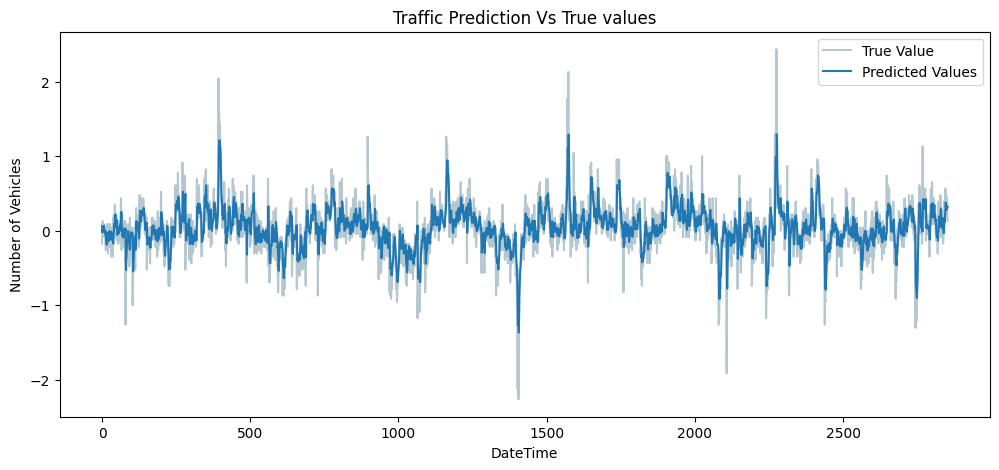

Epoch 1/50
96/96 [==============================] - 17s 137ms/step - loss: 0.0702 - val_loss: 0.0831
Epoch 2/50
96/96 [==============================] - 12s 124ms/step - loss: 0.0607 - val_loss: 0.0794
Epoch 3/50
96/96 [==============================] - 12s 129ms/step - loss: 0.0582 - val_loss: 0.0768
Epoch 4/50
96/96 [==============================] - 12s 122ms/step - loss: 0.0569 - val_loss: 0.0743
Epoch 5/50
96/96 [==============================] - 12s 130ms/step - loss: 0.0559 - val_loss: 0.0724
Epoch 6/50
96/96 [==============================] - 11s 118ms/step - loss: 0.0545 - val_loss: 0.0711
Epoch 7/50
96/96 [==============================] - 11s 113ms/step - loss: 0.0536 - val_loss: 0.0695
Epoch 8/50
96/96 [==============================] - 12s 128ms/step - loss: 0.0529 - val_loss: 0.0686
Epoch 9/50
96/96 [==============================] - 12s 129ms/step - loss: 0.0525 - val_loss: 0.0672
Epoch 10/50
96/96 [==============================] - 12s 129ms/step - loss: 0.0516 - val_lo

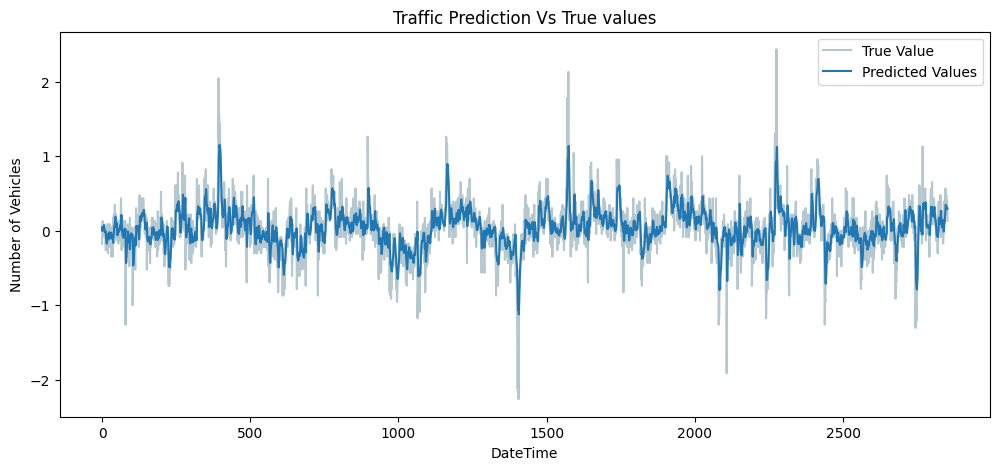

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
data=pd.read_csv("/content/traffic.csv")
data.head()
data['DateTime']=pd.to_datetime(data['DateTime'])

data["Year"]=data['DateTime'].dt.year

data["Month"]=data['DateTime'].dt.month

data["Date_no"]=data['DateTime'].dt.day

data["Hour"]=data['DateTime'].dt.hour

data["Day"]= data['DateTime'].dt.strftime("%A")
data
sns.lineplot(x=data['Date_no'],y="Vehicles",data=data,hue='Junction')
data = data[(data['Junction'] == 1)]
def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    return df_normalized, average, stdev

def Difference(df,col, interval):
    diff = []
    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
    return diff
df_N, av, std = Normalize(data, "Vehicles")
Diff = Difference(df_N, col="Vehicles", interval=(24*7)) #taking a week's diffrence
df_N = df_N[24*7:]
df_N.columns = ["Norm"]
df_N["Diff"]= Diff
df = df_N["Diff"].dropna()
df = df.to_frame()
df.head()
df.shape
def Split_data(df):
    training_size = int(len(df)*0.80)
    data_len = len(df)
    train, test = df[0:training_size],df[training_size:data_len]
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test

df_train, df_test = Split_data(df)
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X ,y

def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    return train, test

X_train, y_train = TnF(df_train)
X_test, y_test = TnF(df_test)
X_train, X_test = FeatureFixShape(X_train, X_test)
X_train, X_test = FeatureFixShape(X_train, X_test)
from sklearn.metrics import mean_absolute_error

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)

def MLP_model(X_Train, y_Train, X_Test, y_Test):
    X_Train = np.squeeze(X_Train)  # This line removes the unnecessary dimension
    X_Test = np.squeeze(X_Test)    # Do the same for the test data
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=X_Train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(20, activation='relu', input_dim=X_Train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train, y_Train, validation_data=(X_test, y_test), epochs=50, batch_size=120, callbacks=[early_stopping])
    pred_MLP = model.predict(X_Test)
    return pred_MLP
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

def MAE_Value(test,predicted):
    mae = mean_absolute_error(test, predicted)
    print("The MAE is {}.".format(mae))
    return mae

#To plot the comparitive plot of targets and predictions
def PredictionsPlot(test,predicted,m):
    plt.figure(figsize=(12,5))
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )
    plt.plot(predicted,label="Predicted Values")
    plt.title("Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()
Pred_MLP = MLP_model(X_train,y_train,X_test, y_test)
colors = ["#6D91A1","#74B3CE1","#536D7A","#3E535B"]
RMSE_MLP = RMSE_Value(y_test, Pred_MLP)
MAE_MLP = MAE_Value(y_test, Pred_MLP)
PredictionsPlot(y_test, Pred_MLP, 0)
def inverse_difference(last_ob, value):
    inversed = value + last_ob
    return inversed

def Sub_Plots(df_1, df_2,title,m):
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True)
    fig.suptitle(title)

    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[m])
    axes[0].set(ylabel ="Prediction")

    pl_2=sns.lineplot(ax=axes[1],data=df_2["Vehicles"],color="#3E535B")
    axes[1].set(ylabel ="Original")
recover = df_N.Norm[-2854:-1].to_frame()
recover["Pred"]= globals()[f"Pred_MLP"]
Transform_reverssed = inverse_difference(recover.Norm, recover.Pred).to_frame()
Transform_reverssed.columns = ["Pred_Normed"]
Final_Pred = (Transform_reverssed.values* std) + av
Transform_reverssed["Pred_Final"] = Final_Pred
Sub_Plots(Transform_reverssed["Pred_Final"], data[-2854:-1],"Predictions And Originals For Junction 1", 0)
def GRU_model(X_Train, y_Train, X_Test, y_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)
    #callback delta 0.01 may interrupt the learning.

    #The GRU model
    model = Sequential()
    model.add(GRU(units=100, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=20, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    #Compiling the model
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, validation_data=(X_Test, y_Test), epochs=50, batch_size=120,callbacks=[early_stopping])
    pred_GRU= model.predict(X_Test)
    return pred_GRU
def LSTM_model(X_Train, y_Train, X_Test, y_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)

    #The LSTM model
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=20, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    #Compiling the model
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, validation_data=(X_Test, y_Test), epochs=50, batch_size=120,callbacks=[early_stopping])
    pred_LSTM = model.predict(X_Test)
    return pred_LSTM
Pred_GRU = GRU_model(X_train,y_train,X_test,y_test)
RMSE_GRU = RMSE_Value(y_test, Pred_GRU)
MAE_GRU = MAE_Value(y_test, Pred_GRU)
PredictionsPlot(y_test, Pred_GRU, 0)
Pred_LSTM = LSTM_model(X_train,y_train,X_test, y_test)
RMSE_LSTM = RMSE_Value(y_test, Pred_LSTM)
MAE_LSTM = MAE_Value(y_test, Pred_LSTM)
PredictionsPlot(y_test, Pred_LSTM, 0)

